# Exercise 3 - Binary Classification with Logistic Regression (30 Points)

This exercise is meant to familiarize you with the complete pipeline of solving a machine learning problem. You
need to obtain and pre-process the data, develop, implement and train a machine learning model and evaluate it
by splitting the data into a train and testset.

First, we will derive and implement all the functions we need and put it into a single class.

In a second part, we will use this class to build a spam filter.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- paul.kahlmeyer@uni-jena.de

### Submission

- Deadline of submission:
        19.05.2021
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=18310)

## Data Preparation

In the model of *logistic regression*, we have $m$ samples $x_i\in\mathbb{R}^n$ with labels $y_i\in\{-1,1\}$.
In this exercise, we will use the equivalent formulation with $y_i\in\{0,1\}$.
We use the example dataset `data.npy`, where we have 2 dimensional features (first two columns) and a binary label (3rd column).

### Task 1 (1 Point)
Load and split the dataset into samples and labels. Then plot the data with a scatterplot and use different colors for different labels.

Text(0, 0.5, 'X1')

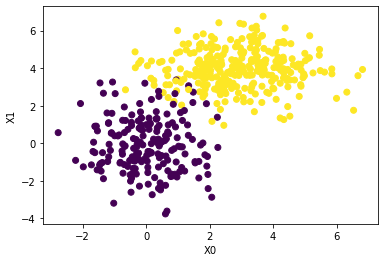

In [7]:
# TODO: Load and split dataset

import numpy as np
# load data
data = np.load('data.npy')
X = data[:,:-1]
Y = data[:,-1]

# TODO: plot data
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=Y)
plt.xlabel("X0")
plt.ylabel("X1")

The goal in logistic regression is to find the parameter vector $\theta\in\mathbb{R}^n$, so that 

\begin{align}
p(y_i=1|x_i,\theta)&=\sigma(x_i^T\theta)\\
p(y_i=0|x_i,\theta)&=1-p(y_i=1|x_i,\theta)
\end{align}

fits our data and can be used to predict the label on unseen data (binary classification).

The function $\sigma$ is called the logistic *sigmoid function*
\begin{align}
\sigma(a) = \cfrac{1}{1+\exp(-a)}
\end{align}

With an estimated $\theta$, a new feature $x\in\mathbb{R}^n$ is classified according to.

\begin{align}
\hat{y} = \begin{cases}
1\text{, if }p(y=1|x,\theta)\geq 0.5\\
0\text{, else}
\end{cases}
\end{align}

### Task 2 (1 Point)
Prepare `X` so that the classification function for an estimated $\theta$ is [*affine*](https://math.stackexchange.com/questions/275310/what-is-the-difference-between-linear-and-affine-function). Add this affine component at the **first column**.

In [8]:
# TODO: Prepare X
X=np.insert(X,0,1.0,axis=1)
X[:3]

array([[ 1.        ,  4.8777683 ,  3.89871851],
       [ 1.        , -1.1680935 , -0.05555429],
       [ 1.        , -0.68944918,  1.92973945]])

### Task 3 (2 Points)

Implement a `predict` function based on the above definition of probabilities.
The function should take $m$ input features $X\in\mathbb{R}^{m\times n}$ and a vector $\theta$ as input and output predictions $\hat{Y}\in\{0,1\}^m$.

Test your function with a randomly chosen $\theta$.

In [9]:
def sigmoid(X, theta):
    # TODO: implement sigmoid function
    a = X @ theta
    return 1 / (1 + np.exp(-a))

def predict(X,theta):
    # TODO: calculate and return predictions
    prob = sigmoid(X,theta)
    return np.round(prob)

# TODO: test function
np.random.seed(0)
theta = np.random.rand(X.shape[1])
predict(X, theta)

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1.

## Learning $\theta$

For a given $\theta$, we can calculate $p(y_i|\theta)$ and use this probability for classification.
To evaluate how well a learned $\theta$ can be used to classify our data, we define a *loss function*.
Here we want to use [binary cross entropy](https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a) given as:
\begin{align}
L(\theta) = -\cfrac{1}{m}\sum_{i=1}^m y_i\log(p(y_i=1|x_i,\theta))+(1-y_i)\log(1-p(y_i=1|x_i,\theta))
\end{align}
Often it is convenient to have multiple metrics at hand. In classification problems, the *accuracy* of a
prediction is defined as the percentage of correctly classified features. In the case of logistic regression, this corresponds to 
\begin{align}
Acc(\theta) = \cfrac{1}{m}\sum_{i=1}^m y_i\mathbf{1}(p(y_i=1|x_i\theta)\geq 0.5) + (1-y_i)\mathbf{1}(p(y_i=0|x_i,\theta)> 0.5)
\end{align}
where $\mathbf{1}$ is the indicator function (takes value 1, if argument is true; takes value 0, if argument is false).

As our model becomes better, we expect the accuracy to increase and the loss to decrease.  

### Task 4 (2 Points)
Implement the binary cross entropy and the accuracy for logistic regression. 
The loss takes the features $X$, the true labels $Y$ and the parameter vector $\theta$ as input, whereas the accuracy only needs $Y$ and the predicted labels $\hat{Y}$.

Again, test your functions with a randomly chosen $\theta$.

In [10]:
def loss(X, Y, theta):
    # TODO: implement binary cross entropy
    probs = sigmoid(X,theta)
    return -np.mean(Y*np.log(probs) + (1-Y)*np.log(1-probs))

def acc(Y, Y_hat):
    # TODO: implement accuracy
    return np.mean(Y==Y_hat)

# TODO: test function
np.random.seed(0)
theta = np.random.rand(X.shape[1])
Y_hat = predict(X, theta)
loss(X,Y,theta), acc(Y, Y_hat)

(0.44557368213985954, 0.73)

Given the loss function $L(\theta)$, we want to minimize this function with respect to the parameters $\theta$, that is we are looking for

\begin{align}
    \text{argmin}_\theta L(\theta)
\end{align}

However, since this is a highly nonlinear optimization problem, we use an iterative approach that starts with an initial estimate for $\theta$ and approaches the solution at each iteration step. 
The most simple approach is to take the gradient
$\nabla L(\theta)$ of $L(\theta)$ with respect to $\theta$ and walk into direction of the negative gradient. 
This method is called gradient-descent.

### Task 5 (3 Points)

Calculate $\nabla L(\theta) = \cfrac{\partial L}{\partial \theta}$ and implement this function.
The resulting function takes features $X$, labels $Y$ and the probabilities $p(y_i=1|x_i,\theta)$ as input and outputs a gradient $\nabla L(\theta)\in\mathbb{R}^n$.

Again, test your function with a randomly chosen $\theta$.

Hint: use Google

Solution (2 Points):
\begin{align}
\cfrac{\partial L}{\partial \theta} =\cfrac{1}{m}\sum_{i=1}^m x_i (\sigma(x_i^T\theta)-y_i)
\end{align}

In [11]:
def gradient(X,Y,probs):
    # TODO: Implement gradient (1 Point)
    return (X.T @ (probs- Y))/Y.shape[0]

# TODO: test function
np.random.seed(0)
theta = np.random.rand(X.shape[1])
probs = sigmoid(X, theta)
gradient(X,Y,probs)

array([0.23128281, 0.04198473, 0.03934602])

### Task 6 (3 Points)
With the gradient function, implement the *gradient descend* algorithm:

 1. choose initial $\hat{\theta}$
 2. update $\hat{\theta} \leftarrow \hat{\theta} -\eta\nabla L(\hat{\theta})$
 
The update step is called in a loop until a maximum number of iterations $\lambda$ (parameter `max_it`) is reached or the loss did not change more than $\varepsilon$ (parameter `eps`). The hyperparameter $\eta$ is also called *learning rate* (parameter `lr`).

The function should take the features $X$, the labels $Y$ and values for $\eta,\lambda$ and $\varepsilon$ as input and output $\hat{\theta}$.

Test your function.

In [12]:
def fit(X, Y, lr=1e-2, max_it=100, eps=1e-4):
    # TODO: Implement gradient descend algorithm
    theta = np.zeros(X.shape[1])
    current_loss = loss(X,Y,theta)
    for it in range(max_it):
        probs = sigmoid(X, theta)
        grad = gradient(X,Y,probs)
        
        # update
        theta = theta - lr*grad
        
        # determine accuracy
        Y_hat = predict(X,theta)
        accuracy = acc(Y, Y_hat)
        
        # determine loss
        old_loss = current_loss
        current_loss = loss(X,Y,theta)
        
        if abs(current_loss-old_loss)<eps:
            break    
    return theta

np.random.seed(0)
theta = fit(X,Y)
theta

array([-0.07971801,  0.29104511,  0.40572488])

### Task 7 (4 Points)

Now we have all functionalities and want to bring them together in a single class.

- Use the previously defined functions to implement the `LogReg` class. 
- Make use of the fact, that you can store parameters as attributes. 
- Additionaly track the losses and accuracies that occur during the iterations of gradient descend. 
- Test your class and plot the accuracies and losses over the iterations.

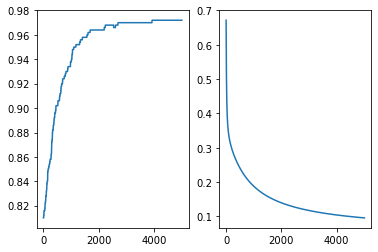

In [13]:
class LogReg():
    # TODO: fill in functions
    
    def __init__(self):
        self.theta = None
        self.accs = []
        self.losses = []
        
    def sigmoid(self, X):
        a = X @ self.theta
        return 1 / (1 + np.exp(-a))

    def predict(self, X):
        prob = self.sigmoid(X)
        return np.round(prob)
    
    def loss(self, X, Y):
        probs = self.sigmoid(X)
        return -np.mean(Y*np.log(probs) + (1-Y)*np.log(1-probs))

    def acc(self, Y, Y_hat):
        return np.mean(Y==Y_hat)
    
    def gradient(self, X, Y, probs):
        return (X.T @ (probs- Y))/Y.shape[0]
    
    def fit(self, X, Y, lr=1e-2, max_it=100, eps=1e-4):
        # TODO: track losses and accuracies
        self.accs = []
        self.losses = []
        self.theta = np.zeros(X.shape[1])
        current_loss = self.loss(X,Y)
        for it in range(max_it):
            probs = self.sigmoid(X)
            grad = self.gradient(X,Y,probs)

            # update
            self.theta = self.theta - lr*grad

            # determine accuracy
            Y_hat = self.predict(X)
            accuracy = self.acc(Y, Y_hat)

            # determine loss
            old_loss = current_loss
            current_loss = self.loss(X, Y)
            
            #track statistics
            self.losses.append(current_loss)
            self.accs.append(accuracy)

            if abs(current_loss-old_loss)<eps:
                break   
                
# TODO: test class + plot losses/accuracies
alg = LogReg()
alg.fit(X,Y, max_it=5000, eps=0)

fig, axs = plt.subplots(ncols=2)
axs[0].plot(alg.accs)
axs[1].plot(alg.losses)

### Task 8 (2 Points)

So far, we used the whole dataset for fittig the `LogReg` class.

- Use [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to split the dataset into train (75%) and testset (25%).
- Fit the Logistic Regression model on the trainset and calculate the final accuracies on the train and testset. 
- Experiment with the hyperparameters for fit, to get a good result.

In [14]:
# TODO: Split data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# TODO: apply logistic regression
alg = LogReg()
alg.fit(X_train,Y_train, max_it=20000, eps=0, lr=5e-2)

# TODO: determine train and test accuracy
test_preds = alg.predict(X_test)
test_acc = alg.acc(Y_test, test_preds)

train_preds = alg.predict(X_train)
train_acc = alg.acc(Y_train, train_preds)

print(f'Test: {test_acc}\tTrain: {train_acc}')

Test: 0.984	Train: 0.9653333333333334


## Visualization

Next we want to visualize our classifier. To to this, we want to visualize the *decision boundary* defined by $\hat{\theta}$.

The decision boundary is defined as 
\begin{align}
\{x\in\mathbb{R}^n: p(y=1|x)=0.5\}
\end{align}

### Task 9 (2 Points)

Implement a function `plot_dec_boundary` that visualizes the data and the regression line for 2 dimensional samples $X$ and an estimated $\hat{\theta}$.

Test this function with the $\hat{\theta}$ estimated in Task 8.

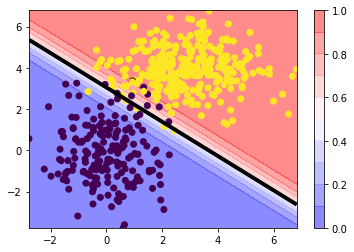

In [15]:
def plot_dec_boundary(X,Y, theta):    
    # TODO: plot data and decision boundary
    
    # make these smaller to increase the resolution
    dx, dy = 0.05, 0.05
    levels = np.arange(0,1.1,1e-1)

    # generate grids + probs
    x1, x2 = np.mgrid[slice(np.min(X[:,1]), np.max(X[:,1]) + dy, dy), slice(np.min(X[:,2]), np.max(X[:,2]) + dx, dx)]
    points = np.stack([np.ones(np.prod(x1.shape)), x1.flatten(),x2.flatten()]).T
    probs = sigmoid(points,theta).reshape(x1.shape)

    # plot points + heatmap
    cmap = plt.get_cmap('bwr')
    plt.contourf(x1, x2, probs, cmap=cmap, levels=levels, alpha=0.5)
    plt.colorbar()
    plt.contour(x1, x2, probs, levels=[0.5], colors='black', linewidths=4)
    
# TODO: test function
theta = alg.theta
plot_dec_boundary(X,Y, theta)
plt.scatter(X[:,1],X[:,2], c=Y)

### Task 10 (2 Points)

Use the [implementation from scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) to train a logistic regressor.

Visualize the regression line that you obtain with scikit learn.

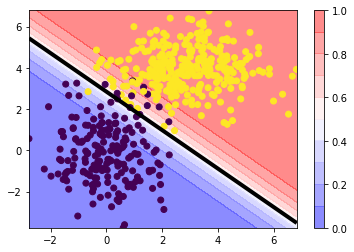

In [16]:
# TODO: estimate theta with scikit-learn (1 Point)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(fit_intercept=False)
logisticRegr.fit(X_train, Y_train)
theta = logisticRegr.coef_[0]

# TODO: plot regression line with data (1 Point)
plot_dec_boundary(X,Y, theta)
plt.scatter(X[:,1],X[:,2], c=Y)

## Spam Filter

We want to use logistic regression to perform Spam Filtering on the [*UCI SMS Spam Collection*](http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/) dataset. The goal is to classify a SMS from its text into the categories "spam" or "ham".

### Task 11 (3 Points)

The dataset is saved as a text file at `SMSSpamCollection.txt`. Find a way to load the dataset and transform the features `X` (SMS) and the labels `Y` (spam/ham) into numerical representations.

Hint:

For transforming SMS into features, check out the bag of words representation from [scikit-learn](https://scikit-learn.org/stable/modules/feature_extraction.html)

In [17]:
# TODO: load and preprocess dataset

# read txt
with open('SMSSpamCollection.txt') as inf:
    lines = inf.readlines()
    
# transform to dataframe
data = {'feature': [], 'label': []}
for line in lines:
    label, feature = line.split('\t')
    data['feature'].append(feature)
    data['label'].append(label)
import pandas as pd
df = pd.DataFrame(data = data)

# labels->0,1
df['label'] = df['label'].map({'ham':0, 'spam':1})
Y = np.array(df['label'])

# features into bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['feature']).toarray()

X.shape, Y.shape

((5574, 8752), (5574,))

### Task 12 (2 Points)

Split the dataset into train (75%) and testset (25%) and use your implementation of logistic regression to learn $\theta$ for this dataset. Try to get your accuracy as high as possible.

Test: 0.975609756097561	Train: 0.9904306220095693


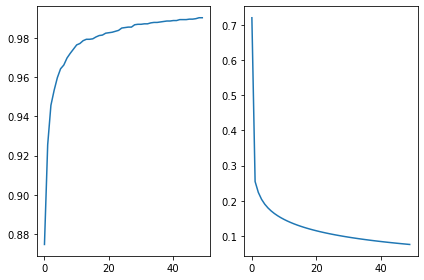

In [20]:
# TODO: use own logistic regression on dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

alg = LogReg()
alg.fit(X_train, Y_train, max_it=50, eps=1e-4, lr=20)

fig, axs = plt.subplots(ncols=2)
axs[0].plot(alg.accs)
axs[1].plot(alg.losses)
plt.tight_layout()

# TODO: determine train and test accuracy
test_preds = alg.predict(X_test)
test_acc = alg.acc(Y_test, test_preds)
train_preds = alg.predict(X_train)
train_acc = alg.acc(Y_train, train_preds)
print(f'Test: {test_acc}\tTrain: {train_acc}')

### Task 13 (3 Points)
Visualizing our classifier is not that easy anymore, as our features are in a high-dimensional space. 
Nevertheless, the values of $\hat{\theta}$ can tell us what words are indicators for the decision for spam/ham.

Use $\hat{\theta}$ and your word encoding to output the top 10 words for ham and spam.

In [19]:
# TODO: use theta to print top 10 words for spam and ham
idx = np.argsort(alg.theta) # from low (ham) to high (spam)
words = vectorizer.get_feature_names()
words = [words[i] for i in idx]

ham_words = words[:10]
spam_words = words[-10:]

print(ham_words)
print(spam_words)

['my', 'ok', 'me', 'll', 'then', 'that', 'what', 'gt', 'lt', 'da']
['claim', 'www', 'free', '150p', 'mobile', 'uk', 'stop', 'reply', 'text', 'txt']
